# I. Project Team Members

| Prepared by | Email | Prepared for |
| :-: | :-: | :-: |
| **Hardefa Rogonondo** | hardefarogonondo@gmail.com | **Tech Talent Recommendation Engine** |

# II. Notebook Target Definition

This notebook is dedicated to the modeling and evaluation stage of our Tech Talent Recommendation Engine Project, where we focus on training and assessing custom-built algorithms. We delve into two self-developed matrix factorization techniques: Alternating Least Squares (ALS) Matrix Factorization and Gradient Descent Matrix Factorization. Our key objective is to scrutinize these algorithms' performance using Mean Squared Error (MSE) and Mean Absolute Error (MAE) as our evaluation metrics. After thorough testing and analysis, we conclude that the ALS approach not only exhibits superior stability but also results in the lowest error rates, making it our selected model for this application.

# III. Notebook Setup

## III.A. Import Libraries

In [1]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import sys
sys.path.append('../..')
from ml_from_scratch.MatrixFactorization import AlternatingLeastSquaresFactorization, GradientDescentFactorization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## III.B. Import Data

In [2]:
train_encoded = pd.read_pickle('../../data/processed/train_encoded.pkl')
test_encoded = pd.read_pickle('../../data/processed/test_encoded.pkl')

In [3]:
train_encoded.head()

,YearsCode,LanguageHaveWorkedWith_Ada,LanguageHaveWorkedWith_Apex,LanguageHaveWorkedWith_APL,LanguageHaveWorkedWith_Assembly,LanguageHaveWorkedWith_Bash/Shell (all shells),LanguageHaveWorkedWith_C,LanguageHaveWorkedWith_C#,LanguageHaveWorkedWith_C++,LanguageHaveWorkedWith_Clojure,LanguageHaveWorkedWith_Cobol,LanguageHaveWorkedWith_Crystal,LanguageHaveWorkedWith_Dart,LanguageHaveWorkedWith_Delphi,LanguageHaveWorkedWith_Elixir,LanguageHaveWorkedWith_Erlang,LanguageHaveWorkedWith_F#,LanguageHaveWorkedWith_Flow,LanguageHaveWorkedWith_Fortran,LanguageHaveWorkedWith_GDScript,LanguageHaveWorkedWith_Go,LanguageHaveWorkedWith_Groovy,LanguageHaveWorkedWith_Haskell,LanguageHaveWorkedWith_HTML/CSS,LanguageHaveWorkedWith_Java,LanguageHaveWorkedWith_JavaScript,LanguageHaveWorkedWith_Julia,LanguageHaveWorkedWith_Kotlin,LanguageHaveWorkedWith_Lisp,LanguageHaveWorkedWith_Lua,LanguageHaveWorkedWith_MATLAB,LanguageHaveWorkedWith_Nim,LanguageHaveWorkedWith_Objective-C,LanguageHaveWorkedWith_OCaml,LanguageHaveWorkedWith_Perl,LanguageHaveWorkedWith_PHP,LanguageHaveWorkedWith_PowerShell,LanguageHaveWorkedWith_Prolog,LanguageHaveWorkedWith_Python,LanguageHaveWorkedWith_R,LanguageHaveWorkedWith_Raku,LanguageHaveWorkedWith_Ruby,LanguageHaveWorkedWith_Rust,LanguageHaveWorkedWith_SAS,LanguageHaveWorkedWith_Scala,LanguageHaveWorkedWith_Solidity,LanguageHaveWorkedWith_SQL,LanguageHaveWorkedWith_Swift,LanguageHaveWorkedWith_TypeScript,LanguageHaveWorkedWith_VBA,LanguageHaveWorkedWith_Visual Basic (.Net),LanguageHaveWorkedWith_Zig,DatabaseHaveWorkedWith_BigQuery,DatabaseHaveWorkedWith_Cassandra,DatabaseHaveWorkedWith_Clickhouse,DatabaseHaveWorkedWith_Cloud Firestore,DatabaseHaveWorkedWith_Cockroachdb,DatabaseHaveWorkedWith_Cosmos DB,DatabaseHaveWorkedWith_Couch DB,DatabaseHaveWorkedWith_Couchbase,DatabaseHaveWorkedWith_Datomic,DatabaseHaveWorkedWith_DuckDB,DatabaseHaveWorkedWith_Dynamodb,DatabaseHaveWorkedWith_Elasticsearch,DatabaseHaveWorkedWith_Firebase Realtime Database,DatabaseHaveWorkedWith_Firebird,DatabaseHaveWorkedWith_H2,DatabaseHaveWorkedWith_IBM DB2,DatabaseHaveWorkedWith_InfluxDB,DatabaseHaveWorkedWith_MariaDB,DatabaseHaveWorkedWith_Microsoft Access,DatabaseHaveWorkedWith_Microsoft SQL Server,DatabaseHaveWorkedWith_MongoDB,DatabaseHaveWorkedWith_MySQL,DatabaseHaveWorkedWith_Neo4J,DatabaseHaveWorkedWith_Oracle,DatabaseHaveWorkedWith_PostgreSQL,DatabaseHaveWorkedWith_RavenDB,DatabaseHaveWorkedWith_Redis,DatabaseHaveWorkedWith_Snowflake,DatabaseHaveWorkedWith_Solr,DatabaseHaveWorkedWith_SQLite,DatabaseHaveWorkedWith_Supabase,DatabaseHaveWorkedWith_TiDB,PlatformHaveWorkedWith_Amazon Web Services (AWS),PlatformHaveWorkedWith_Cloudflare,PlatformHaveWorkedWith_Colocation,PlatformHaveWorkedWith_Digital Ocean,PlatformHaveWorkedWith_Firebase,PlatformHaveWorkedWith_Fly.io,PlatformHaveWorkedWith_Google Cloud,PlatformHaveWorkedWith_Heroku,PlatformHaveWorkedWith_Hetzner,PlatformHaveWorkedWith_IBM Cloud Or Watson,PlatformHaveWorkedWith_Linode,PlatformHaveWorkedWith_Managed Hosting,PlatformHaveWorkedWith_Microsoft Azure,PlatformHaveWorkedWith_Netlify,PlatformHaveWorkedWith_OpenShift,PlatformHaveWorkedWith_OpenStack,PlatformHaveWorkedWith_Oracle Cloud Infrastructure (OCI),PlatformHaveWorkedWith_OVH,PlatformHaveWorkedWith_Render,PlatformHaveWorkedWith_Scaleway,PlatformHaveWorkedWith_Vercel,PlatformHaveWorkedWith_VMware,PlatformHaveWorkedWith_Vultr,WebframeHaveWorkedWith_Angular,WebframeHaveWorkedWith_AngularJS,WebframeHaveWorkedWith_ASP.NET,WebframeHaveWorkedWith_ASP.NET CORE,WebframeHaveWorkedWith_Blazor,WebframeHaveWorkedWith_CodeIgniter,WebframeHaveWorkedWith_Deno,WebframeHaveWorkedWith_Django,WebframeHaveWorkedWith_Drupal,WebframeHaveWorkedWith_Elm,WebframeHaveWorkedWith_Express,WebframeHaveWorkedWith_FastAPI,WebframeHaveWorkedWith_Fastify,WebframeHaveWorkedWith_Flask,WebframeHaveWorkedWith_Gatsby,WebframeHaveWorkedWith_jQuery,WebframeHaveWorkedWith_Laravel,WebframeHaveWorkedWith_Lit,WebframeHaveWorkedWith_NestJS,WebframeHaveWorkedWith_Next.js,WebframeHaveWork

In [4]:
test_encoded.head()

,YearsCode,LanguageHaveWorkedWith_Ada,LanguageHaveWorkedWith_Apex,LanguageHaveWorkedWith_APL,LanguageHaveWorkedWith_Assembly,LanguageHaveWorkedWith_Bash/Shell (all shells),LanguageHaveWorkedWith_C,LanguageHaveWorkedWith_C#,LanguageHaveWorkedWith_C++,LanguageHaveWorkedWith_Clojure,LanguageHaveWorkedWith_Cobol,LanguageHaveWorkedWith_Crystal,LanguageHaveWorkedWith_Dart,LanguageHaveWorkedWith_Delphi,LanguageHaveWorkedWith_Elixir,LanguageHaveWorkedWith_Erlang,LanguageHaveWorkedWith_F#,LanguageHaveWorkedWith_Flow,LanguageHaveWorkedWith_Fortran,LanguageHaveWorkedWith_GDScript,LanguageHaveWorkedWith_Go,LanguageHaveWorkedWith_Groovy,LanguageHaveWorkedWith_Haskell,LanguageHaveWorkedWith_HTML/CSS,LanguageHaveWorkedWith_Java,LanguageHaveWorkedWith_JavaScript,LanguageHaveWorkedWith_Julia,LanguageHaveWorkedWith_Kotlin,LanguageHaveWorkedWith_Lisp,LanguageHaveWorkedWith_Lua,LanguageHaveWorkedWith_MATLAB,LanguageHaveWorkedWith_Nim,LanguageHaveWorkedWith_Objective-C,LanguageHaveWorkedWith_OCaml,LanguageHaveWorkedWith_Perl,LanguageHaveWorkedWith_PHP,LanguageHaveWorkedWith_PowerShell,LanguageHaveWorkedWith_Prolog,LanguageHaveWorkedWith_Python,LanguageHaveWorkedWith_R,LanguageHaveWorkedWith_Raku,LanguageHaveWorkedWith_Ruby,LanguageHaveWorkedWith_Rust,LanguageHaveWorkedWith_SAS,LanguageHaveWorkedWith_Scala,LanguageHaveWorkedWith_Solidity,LanguageHaveWorkedWith_SQL,LanguageHaveWorkedWith_Swift,LanguageHaveWorkedWith_TypeScript,LanguageHaveWorkedWith_VBA,LanguageHaveWorkedWith_Visual Basic (.Net),LanguageHaveWorkedWith_Zig,DatabaseHaveWorkedWith_BigQuery,DatabaseHaveWorkedWith_Cassandra,DatabaseHaveWorkedWith_Clickhouse,DatabaseHaveWorkedWith_Cloud Firestore,DatabaseHaveWorkedWith_Cockroachdb,DatabaseHaveWorkedWith_Cosmos DB,DatabaseHaveWorkedWith_Couch DB,DatabaseHaveWorkedWith_Couchbase,DatabaseHaveWorkedWith_Datomic,DatabaseHaveWorkedWith_DuckDB,DatabaseHaveWorkedWith_Dynamodb,DatabaseHaveWorkedWith_Elasticsearch,DatabaseHaveWorkedWith_Firebase Realtime Database,DatabaseHaveWorkedWith_Firebird,DatabaseHaveWorkedWith_H2,DatabaseHaveWorkedWith_IBM DB2,DatabaseHaveWorkedWith_InfluxDB,DatabaseHaveWorkedWith_MariaDB,DatabaseHaveWorkedWith_Microsoft Access,DatabaseHaveWorkedWith_Microsoft SQL Server,DatabaseHaveWorkedWith_MongoDB,DatabaseHaveWorkedWith_MySQL,DatabaseHaveWorkedWith_Neo4J,DatabaseHaveWorkedWith_Oracle,DatabaseHaveWorkedWith_PostgreSQL,DatabaseHaveWorkedWith_RavenDB,DatabaseHaveWorkedWith_Redis,DatabaseHaveWorkedWith_Snowflake,DatabaseHaveWorkedWith_Solr,DatabaseHaveWorkedWith_SQLite,DatabaseHaveWorkedWith_Supabase,DatabaseHaveWorkedWith_TiDB,PlatformHaveWorkedWith_Amazon Web Services (AWS),PlatformHaveWorkedWith_Cloudflare,PlatformHaveWorkedWith_Colocation,PlatformHaveWorkedWith_Digital Ocean,PlatformHaveWorkedWith_Firebase,PlatformHaveWorkedWith_Fly.io,PlatformHaveWorkedWith_Google Cloud,PlatformHaveWorkedWith_Heroku,PlatformHaveWorkedWith_Hetzner,PlatformHaveWorkedWith_IBM Cloud Or Watson,PlatformHaveWorkedWith_Linode,PlatformHaveWorkedWith_Managed Hosting,PlatformHaveWorkedWith_Microsoft Azure,PlatformHaveWorkedWith_Netlify,PlatformHaveWorkedWith_OpenShift,PlatformHaveWorkedWith_OpenStack,PlatformHaveWorkedWith_Oracle Cloud Infrastructure (OCI),PlatformHaveWorkedWith_OVH,PlatformHaveWorkedWith_Render,PlatformHaveWorkedWith_Scaleway,PlatformHaveWorkedWith_Vercel,PlatformHaveWorkedWith_VMware,PlatformHaveWorkedWith_Vultr,WebframeHaveWorkedWith_Angular,WebframeHaveWorkedWith_AngularJS,WebframeHaveWorkedWith_ASP.NET,WebframeHaveWorkedWith_ASP.NET CORE,WebframeHaveWorkedWith_Blazor,WebframeHaveWorkedWith_CodeIgniter,WebframeHaveWorkedWith_Deno,WebframeHaveWorkedWith_Django,WebframeHaveWorkedWith_Drupal,WebframeHaveWorkedWith_Elm,WebframeHaveWorkedWith_Express,WebframeHaveWorkedWith_FastAPI,WebframeHaveWorkedWith_Fastify,WebframeHaveWorkedWith_Flask,WebframeHaveWorkedWith_Gatsby,WebframeHaveWorkedWith_jQuery,WebframeHaveWorkedWith_Laravel,WebframeHaveWorkedWith_Lit,WebframeHaveWorkedWith_NestJS,WebframeHaveWorkedWith_Next.js,WebframeHaveWork

# IV. Models Training and Evaluation

## IV.A. Data Shape Inspection

In [5]:
train_encoded.shape, test_encoded.shape

((51635, 401), (22130, 401))

## IV.B. Data Information Inspection

In [6]:
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51635 entries, 59619 to 76007
Columns: 401 entries, YearsCode to DevType_System administrator
dtypes: float64(1), int32(400)
memory usage: 79.6 MB


In [7]:
test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22130 entries, 84079 to 88378
Columns: 401 entries, YearsCode to DevType_System administrator
dtypes: float64(1), int32(400)
memory usage: 34.1 MB


## IV.C. Machine Learning from Scratch

Note: This is for development purpose only.

### IV.C.1. Alternating Least Squares Matrix Factorization

In [8]:
class AlternatingLeastSquaresFactorizationDev:
    def __init__(self, iterations=10, num_factors=5, regularization=0.1):
        self.iterations = iterations
        self.num_factors = num_factors
        self.regularization = regularization
        self.talents_factors = None
        self.skills_factors = None

    def factorization(self):
        return np.dot(self.talents_factors, self.skills_factors.T)

    def calculate_mse(self, X):
        factorized_matrix = self.factorization()
        mask = np.nonzero(X)
        mse = np.mean((X[mask] - factorized_matrix[mask]) ** 2)
        return mse

    def calculate_mae(self, X):
        factorized_matrix = self.factorization()
        mask = np.nonzero(X)
        mae = np.mean(np.abs(X[mask] - factorized_matrix[mask]))
        return mae

    def _als_step(self, status, solve_vectors, fixed_vectors):
        YTY = fixed_vectors.T.dot(fixed_vectors)
        lambdaI = np.eye(YTY.shape[0]) * self.regularization
        for u in range(solve_vectors.shape[0]):
            if isinstance(status, pd.DataFrame):
                user_status = status.iloc[u].values
            else:
                user_status = status[u]
            solve_vectors[u] = np.linalg.solve(
                YTY + lambdaI, user_status.dot(fixed_vectors))
        return solve_vectors

    def fit(self, tech_talents_matrix):
        if isinstance(tech_talents_matrix, pd.DataFrame):
            tech_talents_matrix = tech_talents_matrix.to_numpy()
        num_talents, num_skills = tech_talents_matrix.shape
        self.talents_factors = np.random.normal(
            scale=1./self.num_factors, size=(num_talents, self.num_factors))
        self.skills_factors = np.random.normal(
            scale=1./self.num_factors, size=(num_skills, self.num_factors))
        for iteration in range(self.iterations):
            self.talents_factors = self._als_step(
                tech_talents_matrix, self.talents_factors, self.skills_factors)
            self.skills_factors = self._als_step(
                tech_talents_matrix.T, self.skills_factors, self.talents_factors)
            mse = self.calculate_mse(tech_talents_matrix)
            mae = self.calculate_mae(tech_talents_matrix)
            print(f"Iteration: {iteration + 1}, MSE: {mse}, MAE: {mae}")
        return self

    def predict(self, df):
        if isinstance(df, pd.DataFrame):
            df_array = df.to_numpy()
        else:
            df_array = df
        num_talents, num_skills = df_array.shape
        predictions = np.zeros((num_talents, num_skills))
        for i in range(num_talents):
            for j in range(num_skills):
                predictions[i, j] = np.dot(
                    self.talents_factors[i, :], self.skills_factors[j, :].T)
        return predictions

### IV.C.2. Gradient Descent Matrix Factorization

In [9]:
class GradientDescentFactorization:
    def __init__(self, lambda_reg=0.1, learning_rate=0.01, num_epochs=10, num_factors=10):
        self.lambda_reg = lambda_reg
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_factors = num_factors

    def factorization(self):
        return np.dot(self.talents_factors, self.skills_factors.T)

    def calculate_mse(self, X):
        factorized_matrix = self.factorization()
        mask = np.nonzero(X)
        mse = np.mean((X[mask] - factorized_matrix[mask]) ** 2)
        return mse

    def calculate_mae(self, X):
        factorized_matrix = self.factorization()
        mask = np.nonzero(X)
        mae = np.mean(np.abs(X[mask] - factorized_matrix[mask]))
        return mae

    def fit(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        num_talents, num_skills = X.shape
        self.talents_factors = np.random.normal(
            scale=1./self.num_factors, size=(num_talents, self.num_factors))
        self.skills_factors = np.random.normal(
            scale=1./self.num_factors, size=(num_skills, self.num_factors))
        for epoch in range(self.num_epochs):
            for i in range(num_talents):
                for j in range(num_skills):
                    if X[i, j] > 0:
                        err = X[i, j] - np.dot(self.talents_factors[i, :],
                                               self.skills_factors[j, :].T)
                        self.talents_factors[i, :] += self.learning_rate * (
                            err * self.skills_factors[j, :] - self.lambda_reg * self.talents_factors[i, :])
                        self.skills_factors[j, :] += self.learning_rate * (
                            err * self.talents_factors[i, :] - self.lambda_reg * self.skills_factors[j, :])
            mse = self.calculate_mse(X)
            mae = self.calculate_mae(X)
            print(f"Epoch: {epoch+1}, MSE: {mse}, MAE: {mae}")
        return self

    def predict(self, df):
        if isinstance(df, pd.DataFrame):
            df_array = df.to_numpy()
        else:
            df_array = df
        num_talents, num_skills = df_array.shape
        if num_talents > self.talents_factors.shape[0] or num_skills > self.skills_factors.shape[0]:
            raise ValueError(
                "DataFrame contains more data than the model was trained on.")
        return np.dot(self.talents_factors[:num_talents, :], self.skills_factors[:num_skills, :].T)

## IV.D. Model Training

In [10]:
alsf_model = AlternatingLeastSquaresFactorization(
    iterations=5, num_factors=5, regularization=0.1).fit(train_encoded)
alsf_model

Iteration: 1, MSE: 0.704568721526841, MAE: 0.8027180493743199
Iteration: 2, MSE: 0.4462063205305808, MAE: 0.611598992773672
Iteration: 3, MSE: 0.4370436899383288, MAE: 0.6028354868949556
Iteration: 4, MSE: 0.4355945718409306, MAE: 0.6014350072510609
Iteration: 5, MSE: 0.43509326465448694, MAE: 0.601014676536111


In [11]:
gdf_model = GradientDescentFactorization(
    lambda_reg=0.05, learning_rate=0.01, num_epochs=5, num_factors=5).fit(train_encoded)
gdf_model

Epoch: 1, MSE: 0.9215962120675473, MAE: 0.9466793842265313
Epoch: 2, MSE: 0.27597110062591146, MAE: 0.4320344835542358
Epoch: 3, MSE: 0.0857861955537368, MAE: 0.23080579794981138
Epoch: 4, MSE: 0.05065081986401333, MAE: 0.17962550107860242
Epoch: 5, MSE: 0.03671745925837367, MAE: 0.1545780182593377


## IV.E. Model Performance Review

In [12]:
def evaluate_model_performance(model, train, test):
    train_predictions = model.predict(train)
    test_predictions = model.predict(test)
    actual_train = train_encoded.values.flatten()
    predicted_train = train_predictions.flatten()
    actual_test = test_encoded.values.flatten()
    predicted_test = test_predictions.flatten()
    train_mae = mean_absolute_error(actual_train, predicted_train)
    train_mse = mean_squared_error(actual_train, predicted_train)
    test_mae = mean_absolute_error(actual_test, predicted_test)
    test_mse = mean_squared_error(actual_test, predicted_test)
    metrics = pd.DataFrame({
        "Metric": ["MAE", "MSE"],
        "Train": [train_mae, train_mse],
        "Test": [test_mae, test_mse]
    })
    return metrics


def plot_model_performance_by_factors(model_object, train, test, factor_values):
    train_maes = []
    train_mses = []
    test_maes = []
    test_mses = []
    for factors in factor_values:
        model = model_object(num_factors=factors)
        model.fit(train)
        train_predictions = model.predict(train)
        test_predictions = model.predict(test)
        actual_train = train.values.flatten()
        actual_test = test.values.flatten()
        predicted_train = train_predictions.flatten()
        predicted_test = test_predictions.flatten()
        train_maes.append(mean_absolute_error(actual_train, predicted_train))
        train_mses.append(mean_squared_error(actual_train, predicted_train))
        test_maes.append(mean_absolute_error(actual_test, predicted_test))
        test_mses.append(mean_squared_error(actual_test, predicted_test))
    plt.figure(figsize=(12.8, 4.8))
    plt.subplot(1, 2, 1)
    plt.title("MAE vs. Number of Factors")
    plt.plot(factor_values, train_maes, label="Train MAE", marker='o')
    plt.plot(factor_values, test_maes, label="Test MAE", marker='o')
    plt.xlabel("Number of Factors")
    plt.ylabel("Mean Absolute Error")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.title("MSE vs. Number of Factors")
    plt.plot(factor_values, train_mses, label="Train MSE", marker='o')
    plt.plot(factor_values, test_mses, label="Test MSE", marker='o')
    plt.xlabel("Number of Factors")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.show()

### IV.E.1. Alternating Least Squares Matrix Factorization Model Performance Review

In [13]:
alsf_metrics_df = evaluate_model_performance(alsf_model, train_encoded, test_encoded)
alsf_metrics_df

,Metric,Train,Test
0,MAE,0.108483,0.130325
1,MSE,0.050379,0.073227


Iteration: 1, MSE: 0.5813021551398414, MAE: 0.7198274778263187
Iteration: 2, MSE: 0.4450507319590027, MAE: 0.6094582410311354
Iteration: 3, MSE: 0.435204412369268, MAE: 0.6004884625191468
Iteration: 4, MSE: 0.4335139802495903, MAE: 0.599210084166072
Iteration: 5, MSE: 0.43301034606930444, MAE: 0.5989551599196317
Iteration: 6, MSE: 0.43274818206784704, MAE: 0.5988662464598863
Iteration: 7, MSE: 0.4325477322371244, MAE: 0.5987995747211776
Iteration: 8, MSE: 0.43237228305717756, MAE: 0.5987367218079863
Iteration: 9, MSE: 0.4322159848988007, MAE: 0.5986777576877528
Iteration: 10, MSE: 0.43207871368693224, MAE: 0.5986255578445807
Iteration: 1, MSE: 0.5876334451176848, MAE: 0.7219506883294433
Iteration: 2, MSE: 0.4015571297110497, MAE: 0.5697169178228537
Iteration: 3, MSE: 0.384436556098241, MAE: 0.5528314616071228
Iteration: 4, MSE: 0.3789840554035428, MAE: 0.5473631977389288
Iteration: 5, MSE: 0.37695101410948534, MAE: 0.5451800038370878
Iteration: 6, MSE: 0.3760841076361014, MAE: 0.544143

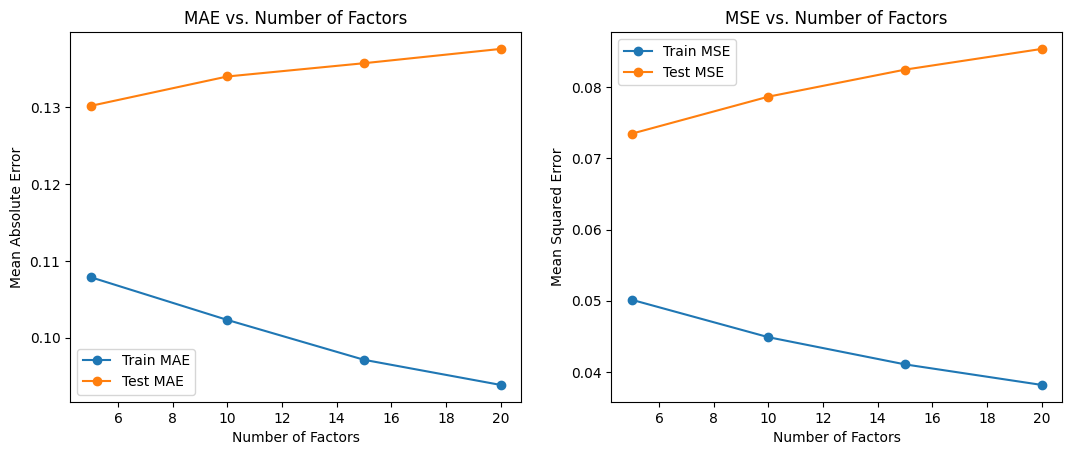

In [14]:
plot_model_performance_by_factors(AlternatingLeastSquaresFactorization, train_encoded, test_encoded, [5, 10, 15, 20])

### IV.E.2. Gradient Descent Matrix Factorization Model Performance Review

In [15]:
gdf_metrics_df = evaluate_model_performance(gdf_model, train_encoded, test_encoded)
gdf_metrics_df

,Metric,Train,Test
0,MAE,0.750591,0.727903
1,MSE,0.625869,0.580961


Epoch: 1, MSE: 0.9697755602479156, MAE: 0.9761089525129151
Epoch: 2, MSE: 0.7588906955361431, MAE: 0.843867109015143
Epoch: 3, MSE: 0.33716518365989895, MAE: 0.516757134138284
Epoch: 4, MSE: 0.20318345469392246, MAE: 0.3899385289435518
Epoch: 5, MSE: 0.1517898042502416, MAE: 0.3347952408029114
Epoch: 6, MSE: 0.12422675288358083, MAE: 0.30243097423247983
Epoch: 7, MSE: 0.10671245685694232, MAE: 0.28045112031013075
Epoch: 8, MSE: 0.09442480737267854, MAE: 0.26420928107307207
Epoch: 9, MSE: 0.08522921320972093, MAE: 0.25152945857141407
Epoch: 10, MSE: 0.07802820350444585, MAE: 0.24123842594607875
Epoch: 1, MSE: 0.9644738689573277, MAE: 0.9737566094899373
Epoch: 2, MSE: 0.5740718238886081, MAE: 0.7276767933115372
Epoch: 3, MSE: 0.20565869651180338, MAE: 0.41336400087202163
Epoch: 4, MSE: 0.1219469105225265, MAE: 0.31604299360662724
Epoch: 5, MSE: 0.08923685422851285, MAE: 0.27087524725559686
Epoch: 6, MSE: 0.07178953375871712, MAE: 0.24385714793006563
Epoch: 7, MSE: 0.0608873480896656, MAE

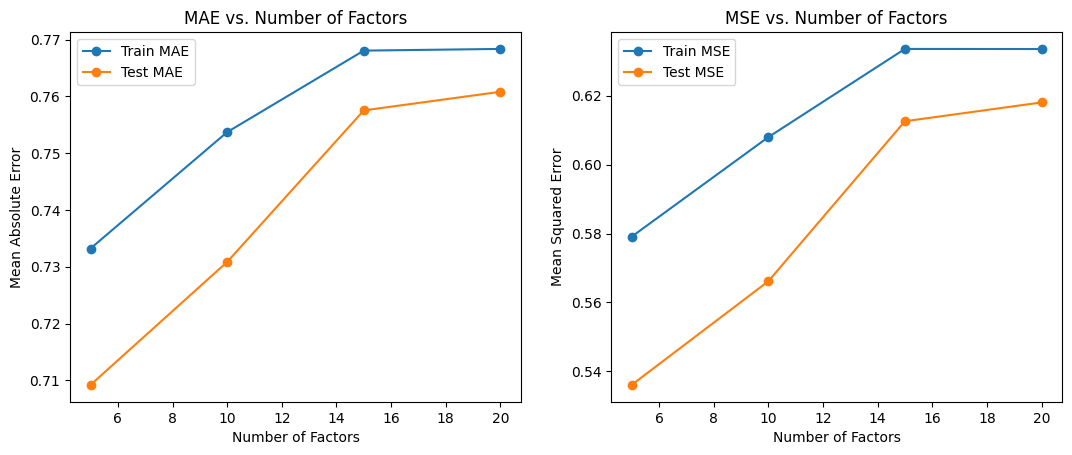

In [16]:
plot_model_performance_by_factors(GradientDescentFactorization, train_encoded, test_encoded, [5, 10, 15, 20])

## IV.F. Export Best Model

In [17]:
with open('../../models/alsf_model.pkl', 'wb') as file:
    pickle.dump(alsf_model, file)